In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


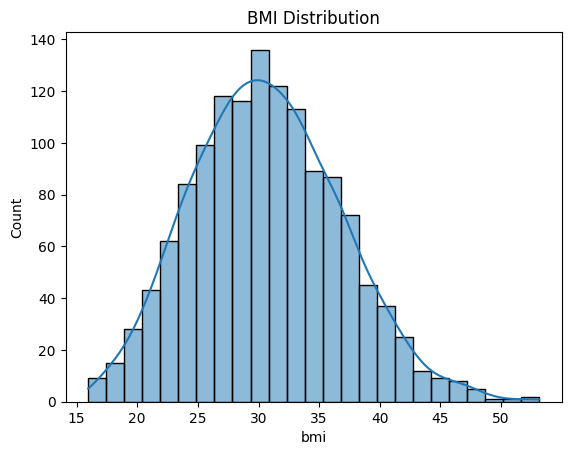

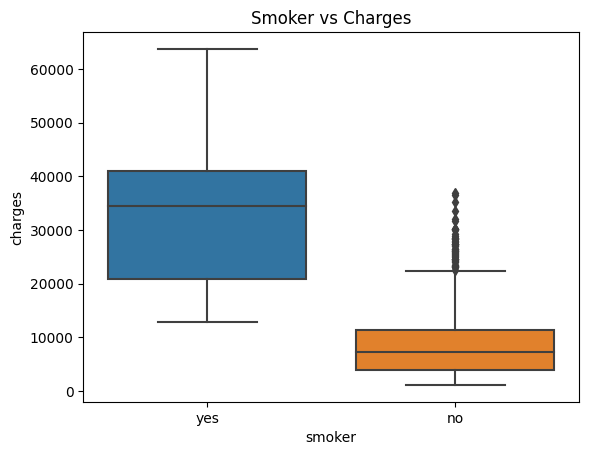

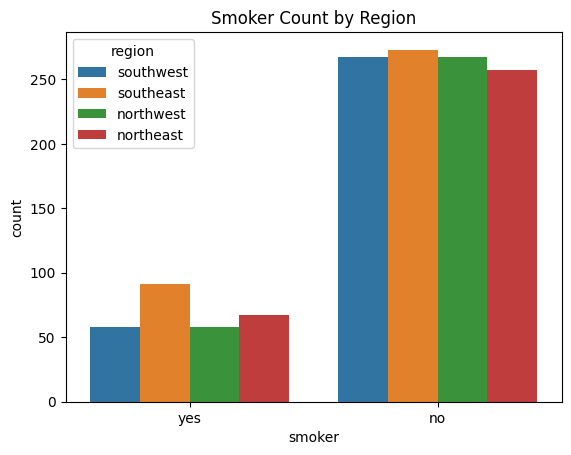

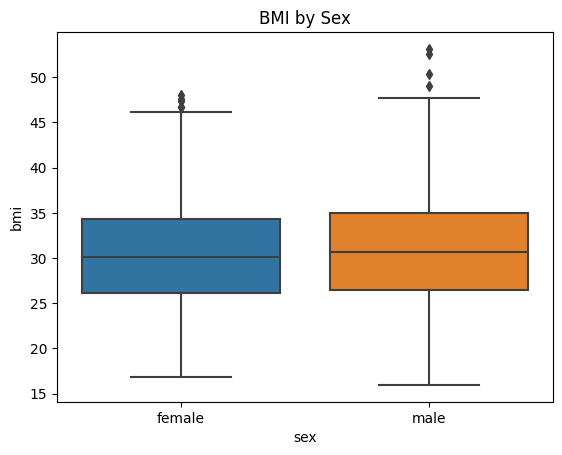

Region with the most children: southeast


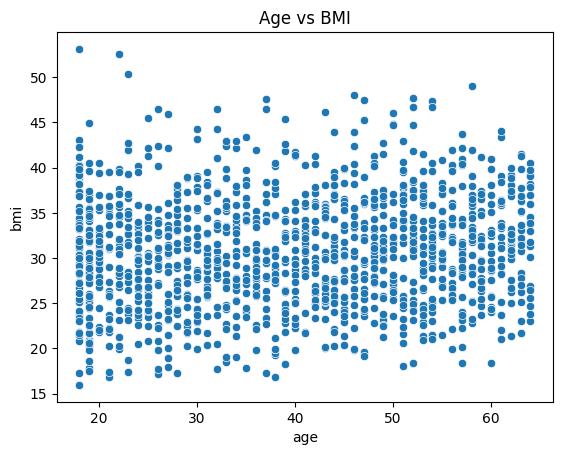

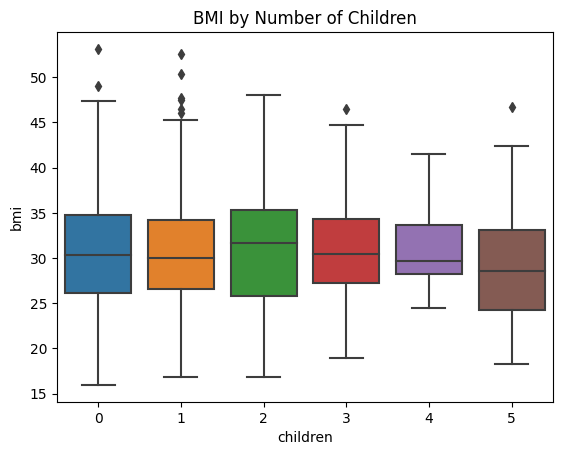

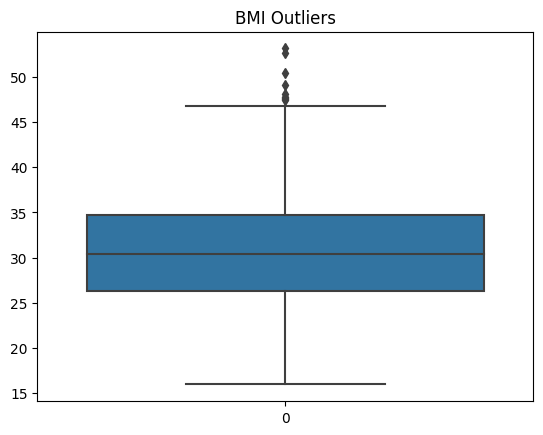

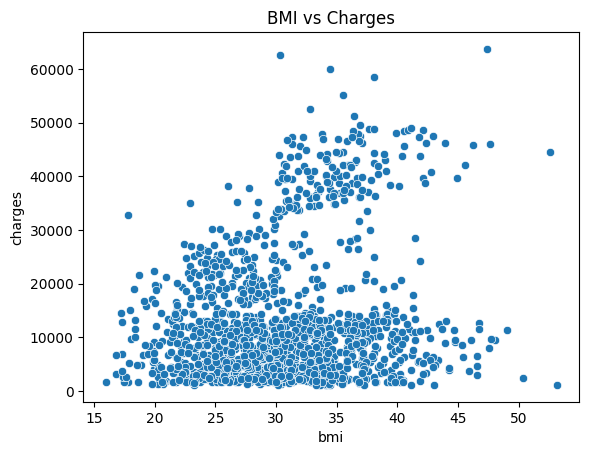

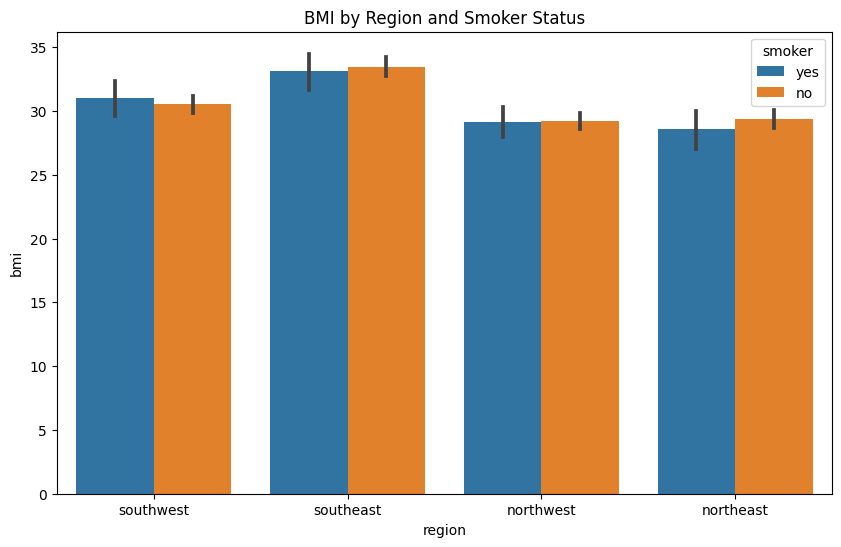

In [2]:
# Load the data
data = pd.read_csv('insurance.csv')

# Examine the distribution of BMI
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

# Examine the relationship between "smoker" and "charges"
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.show()

# Examine the relationship between "smoker" and "region"
sns.countplot(x='smoker', hue='region', data=data)
plt.title('Smoker Count by Region')
plt.show()

# Examine the relationship between "bmi" and "sex"
sns.boxplot(x='sex', y='bmi', data=data)
plt.title('BMI by Sex')
plt.show()

# Find the region with the most children
most_children_region = data.groupby('region')['children'].sum().idxmax()
print(f'Region with the most children: {most_children_region}')

# Examine the relationship between "age" and "bmi"
sns.scatterplot(x='age', y='bmi', data=data)
plt.title('Age vs BMI')
plt.show()

# Examine the relationship between "bmi" and "children"
sns.boxplot(x='children', y='bmi', data=data)
plt.title('BMI by Number of Children')
plt.show()

# Check for outliers in "bmi"
sns.boxplot(data['bmi'])
plt.title('BMI Outliers')
plt.show()

# Examine the relationship between "bmi" and "charges"
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI vs Charges')
plt.show()

# Examine the relationship between "region", "smoker", and "bmi"
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=data)
plt.title('BMI by Region and Smoker Status')
plt.show()


In [3]:
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# One-Hot Encoding for categorical variable 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Splitting the dataset
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)

# Cross-validation scores
linear_scores = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
dt_scores = cross_val_score(decision_tree_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(random_forest_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE
linear_rmse = np.sqrt(-linear_scores.mean())
dt_rmse = np.sqrt(-dt_scores.mean())
rf_rmse = np.sqrt(-rf_scores.mean())

print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Random Forest RMSE: {rf_rmse}')


Linear Regression RMSE: 6160.185958948655
Decision Tree RMSE: 6704.739898180602
Random Forest RMSE: 4976.079104699544


In [ ]:
# Hyper-parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print('Best Parameters:', best_params)
print('Best RMSE:', best_rmse)


In [ ]:
# Evaluate the optimized model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
